<a href="https://colab.research.google.com/github/ijanmejoydas/PlayStore-Data-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## `Playstore Data EDA`

<img src="https://www.opticflux.com/wp-content/uploads/2021/05/Google-Play-Store.jpg" alt="Google Play Store (Android TV) Version 25.1.24 Improves Its Features -  Optic Flux" jsname="HiaYvf" jsaction="load:XAeZkd;" class="n3VNCb" data-noaft="1" style="margin-left: 10%; float: center;  border:5px solid ; width:70%; height : 80%;">

- The `Play Store` apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
- Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
- Lets explore and analyze the data to discover key factors responsible for app engagement and success.

## `Table Of Content`

## `Importing libraries`

In [7]:
import numpy as np # linear algebra
import pandas as pd # data manupulation
import matplotlib.pyplot as plt # for the plot the graph 
import seaborn as sns # used for plot interactive graph.

# for visualizations
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')


# figure size in inches
%matplotlib inline



## `Importing dataset`

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
data = pd.read_csv('/content/drive/MyDrive/project/Play Store Data.csv')
# importing the play store dataset


user_revies = pd.read_csv('/content/drive/MyDrive/project/User Reviews.csv')
# importing the user review dataset

## `Data exploration`
## `(Understanding the Dataset)`

- `Data exploration` is the initial step in data analysis, where users explore a large data set in an unstructured way to uncover initial patterns, characteristics, and points of interest. 
- `Data exploration` can use a combination of manual methods and automated tools such as data visualizations, charts, and initial reports.

In [10]:
data.head() #print first 5 records

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:
print('Shape of data (samples, features):',data.shape)


Shape of data (samples, features): (10841, 13)


In [13]:
print('the columns of the dataset are : ',data.columns)

the columns of the dataset are :  Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


### `Lets Understand about features`

- App: Application name
- Category: Category the app belongs to
- Rating: Overall user rating of the app (as when scraped)
- Reviews: Number of user reviews for the app (as when scraped)
- Size: Size of the app (as when scraped)
- Installs: Number of user downloads/installs for the app (as when scraped)
- Type: Paid or Free
- Price: Price of the app (as when scraped)
- Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
- Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
- Last Updated: Date when the app was last updated on Play Store (as when scraped)
- Current Ver: Current version of the app available on Play Store (as when scraped)
- Android Ver: Min required Android version (as when scraped)

### `Handling null values`

In [14]:
print(data.isnull().sum())
# get details of null values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [15]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [16]:
data.dropna(inplace=True) 
# Dropping Rows with Null values

In [17]:
print('after dropping null the shape is :',data.shape)

after dropping null the shape is : (9360, 13)


In [18]:
duplicate = data.duplicated()
print(duplicate.sum())

474


In [19]:
data.drop_duplicates(['App'],keep='first',inplace=True)

In [20]:
data.nunique()

App               8190
Category            33
Rating              39
Reviews           5319
Size               413
Installs            19
Type                 2
Price               73
Content Rating       6
Genres             114
Last Updated      1299
Current Ver       2624
Android Ver         31
dtype: int64

In [21]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)
# drop the duplicates

In [22]:
print('after dropping null and duplicates the shape is :',data.shape)

after dropping null and duplicates the shape is : (8190, 13)


- Above we have deleted the nulls and duplicates. In this part we could have filled the nulls of rating with mean, median and mode, but for this dataset we have different approch.
- This is the dataset and info of apps, if we filled with some other values that might effect the analysis of out dataset

## `Exploratory Data Analysis`

### `Basic Data Cleaning`

In [23]:
data.dtypes
#print the datatypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [24]:
data['Rating'].describe()

count    8190.000000
mean        4.173321
std         0.536691
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [25]:
# googleplaystore_df['Rating']=googleplaystore_df['Rating'].astype(float)
# gps_df['Rating'] = pd.to_numeric(gps_df['Rating'], errors='coerce')

In [26]:
data['Rating']=data['Rating'].astype(float)
data['Reviews']=data['Reviews'].astype(int)

# converting dtypes object to float and int

In [27]:
data['Installs']=data['Installs'].str.replace('+','')
data['Installs']=data['Installs'].str.replace(',','')
data['Installs']=data['Installs'].astype(int)

# removing +, , characters from Installs column and Converting to Numeric int64

In [28]:
data['Reviews']=data['Reviews'].astype(int)
# The '+' and ',' in the values under the Installs column is replaced by ' '
# Installs is of object datatype, it is converted to int datatype.

In [29]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [30]:
# Replacing M with 000000 and k with 000 characters in Size column and Converting to Numeric int64, non numeric characters to 0.
# data['Size']=data['Size'].str.replace('M','000000')
# data['Size']=data['Size'].str.replace('k','000')
# data['Size']=data['Size'].replace("Varies with device",0)
# data['Size']=data['Size'].astype('float')
# data['Size']


In [31]:
data['Size'] = data['Size'].str.replace('M','000000',regex=True)
data['Size'] = data['Size'].str.replace('k','000',regex=True)
data['Size'] = pd.to_numeric(data.Size,errors='coerce').fillna(0).astype(np.int64)

In [32]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,FR Calculator,FAMILY,4.0,7,2,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
8186,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
8187,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
8188,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [33]:
data['Price']=data['Price'].str.replace('$','')
data['Price']=data['Price'].astype(float)

In [34]:
# gps_df['Size'] = data.Size.replace("Varies with device",np.nan)
# gps_df['Size'] = gps_df.Size.str.replace("M","000000")  
# gps_df['Size'] = gps_df.Size.str.replace("k","")
# gps_df['Size'] = gps_df.Size.replace("1,000+",1000)
# gps_df['Size'] = gps_df['Size'].astype(float)
# gps_df['Size'].dtype

In [35]:
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)

data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(x))

In [36]:
data['Size']

0       19000000.0
1       14000000.0
2              8.0
3       25000000.0
4              2.0
           ...    
8185           2.0
8186    53000000.0
8187           3.0
8188           0.0
8189    19000000.0
Name: Size, Length: 8190, dtype: float64

In [37]:
#### Change Last update into a datetime column
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated']

0      2018-01-07
1      2018-01-15
2      2018-08-01
3      2018-06-08
4      2018-06-20
          ...    
8185   2017-06-18
8186   2017-07-25
8187   2018-07-06
8188   2015-01-19
8189   2018-07-25
Name: Last Updated, Length: 8190, dtype: datetime64[ns]

In [38]:
data.head()

# clean data 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [39]:
# rating distibution 
# rcParams['figure.figsize'] = 15,7
# g = sns.kdeplot(data.Rating, color="Red", shade = True)
# g.set_xlabel("Rating")
# g.set_ylabel("Frequency")
# plt.title('Distribution of Rating',size = 20)

Text(0.5, 1.0, 'Distribution of Rating')

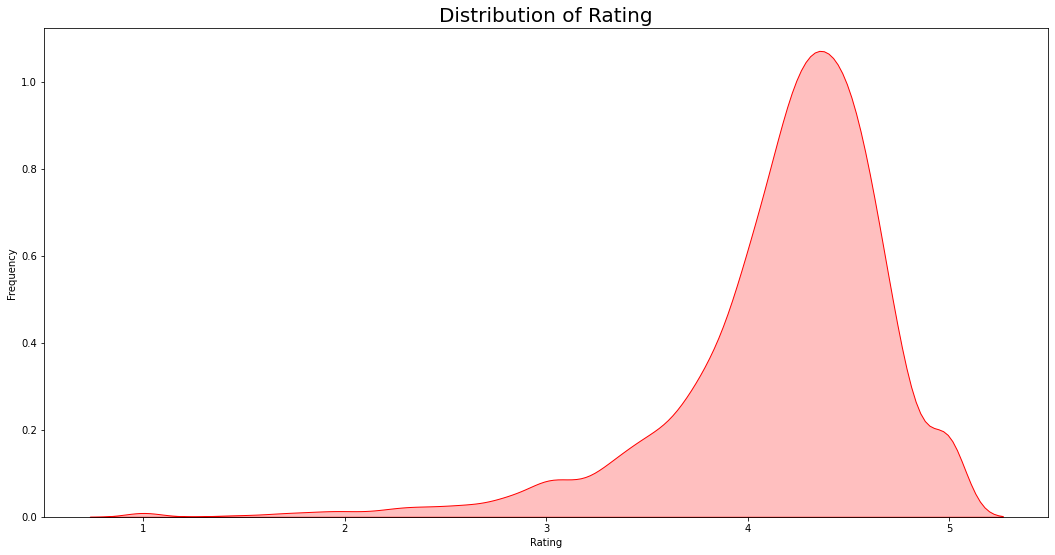

In [40]:
fig = plt.figure(figsize=(18,9)) 
graph = sns.kdeplot(data.Rating, color="Red", shade = True)
graph.set_xlabel("Rating")
graph.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

In [41]:
rat_df = data[data['Rating'] > 4.5]
rat_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.0,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up
13,Mandala Coloring Book,ART_AND_DESIGN,4.6,4326,21000000.0,100000,Free,0.0,Everyone,Art & Design,2018-06-26,1.0.4,4.4 and up
15,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.0,500000,Free,0.0,Everyone,Art & Design,2018-07-31,3.1,4.1 and up
18,ibis Paint X,ART_AND_DESIGN,4.6,224399,31000000.0,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,5.5.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8171,Fr Lupupa Sermons,BUSINESS,4.8,19,21000000.0,100,Free,0.0,Everyone,Business,2018-06-12,1.0,4.4 and up
8177,Fr. Daoud Lamei,FAMILY,5.0,22,8.0,1000,Free,0.0,Teen,Education,2018-06-27,3.8.0,4.1 and up
8181,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.0,10000,Free,0.0,Everyone,Books & Reference,2016-06-19,2.96,4.1 and up
8184,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,1000,Free,0.0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up


In [42]:
rat_df['Category'].value_counts().head(10)

FAMILY                 342
GAME                   159
TOOLS                  111
HEALTH_AND_FITNESS      89
LIFESTYLE               81
MEDICAL                 81
PERSONALIZATION         78
FINANCE                 70
BOOKS_AND_REFERENCE     64
PRODUCTIVITY            63
Name: Category, dtype: int64

Text(0.5, 1.0, 'Count of app in each category')

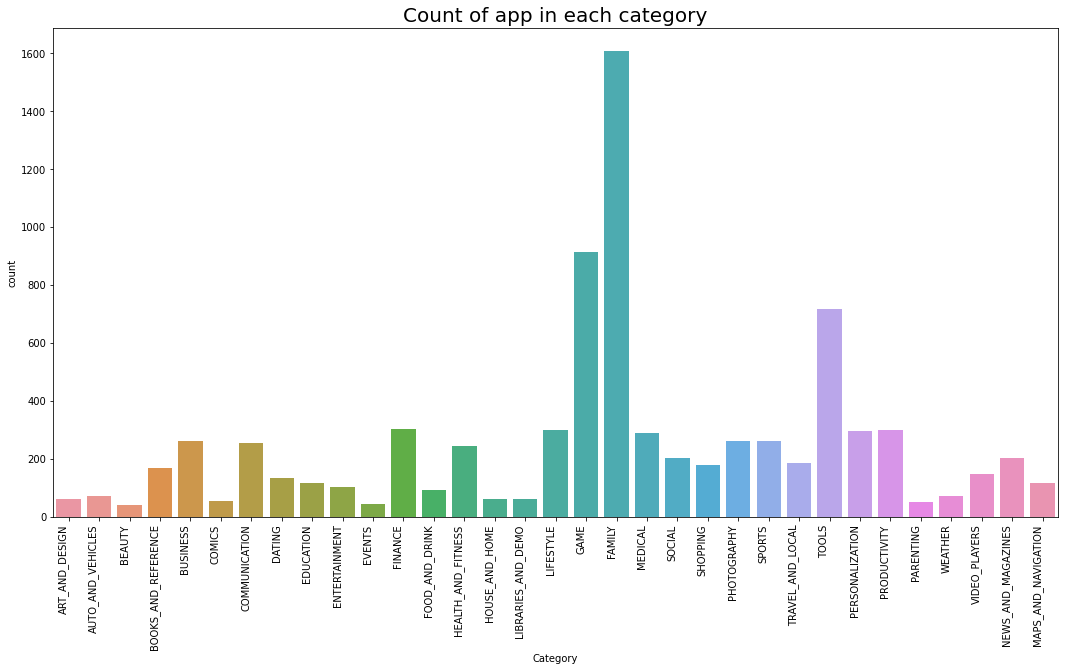

In [54]:
fig = plt.figure(figsize=(18,9)) 
g = sns.countplot(x="Category",data = data)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category',size = 20)

In [45]:
data['Category'].value_counts().head(10)

FAMILY             1607
GAME                912
TOOLS               717
FINANCE             302
PRODUCTIVITY        301
LIFESTYLE           301
PERSONALIZATION     296
MEDICAL             290
BUSINESS            263
PHOTOGRAPHY         263
Name: Category, dtype: int64

In [47]:
print( len(data['Category'].unique()) , "categories")
print("\n", data['Category'].unique())

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Text(0.5, 1.0, 'Count of app in each category')

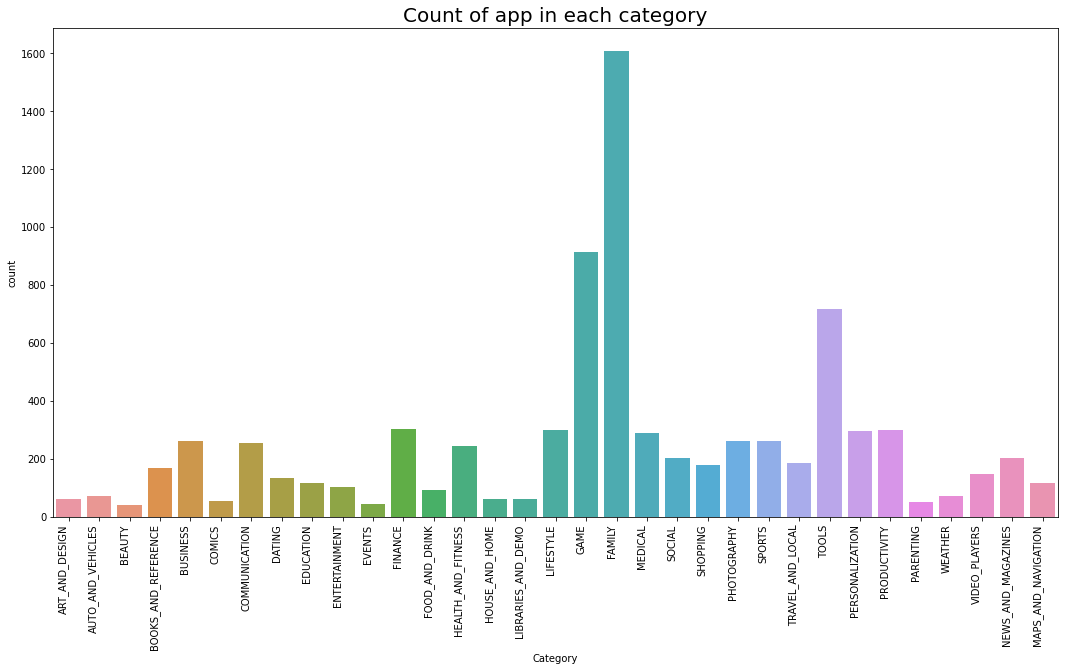

In [55]:
fig = plt.figure(figsize=(18,9)) 
g = sns.countplot(x="Category",data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category',size = 20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

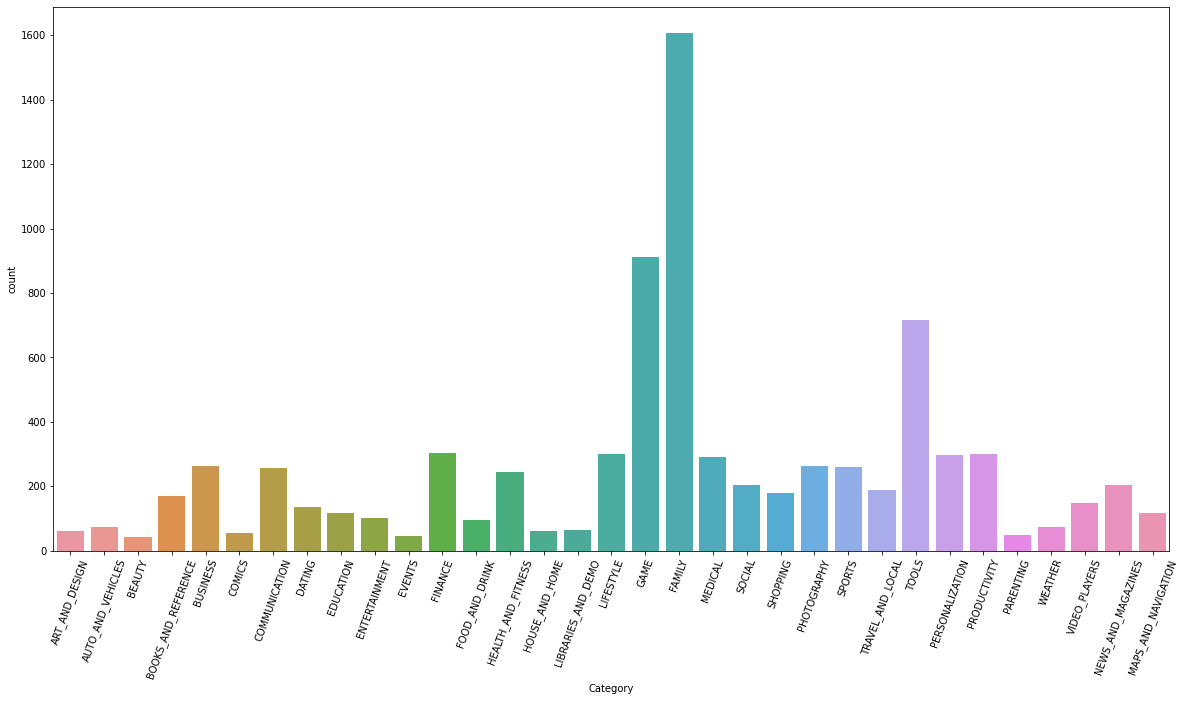

In [49]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Category',data=data)
plt.xticks(rotation=70)

Free    7588
Paid     602
Name: Type, dtype: int64

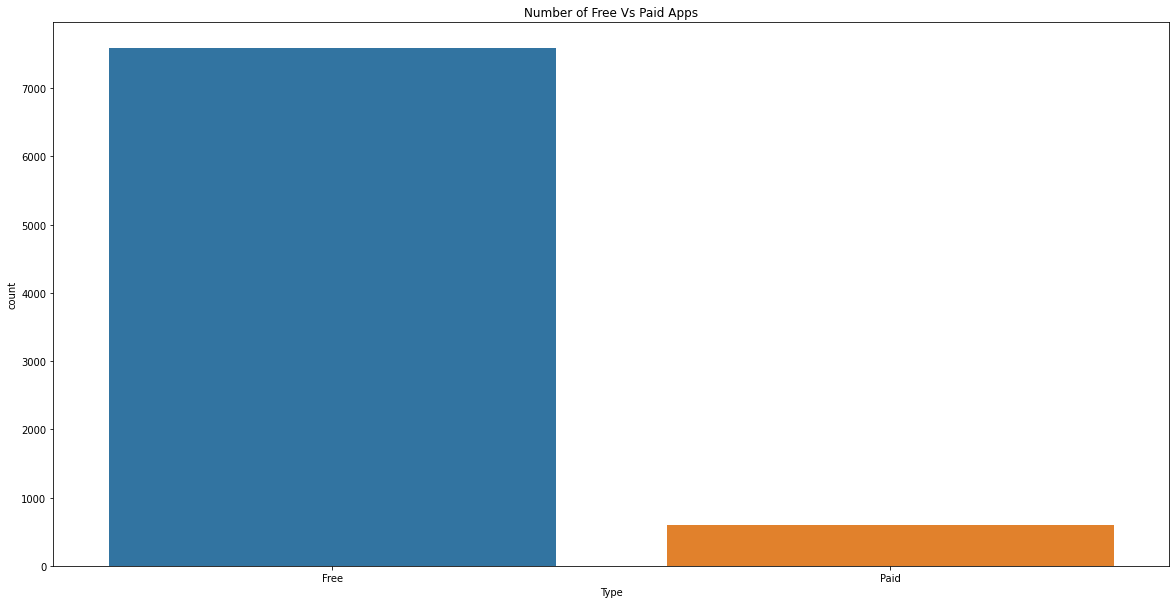

In [50]:
sns.countplot('Type',data=data)
plt.title('Number of Free Vs Paid Apps')
data['Type'].value_counts()

<Figure size 1440x720 with 0 Axes>

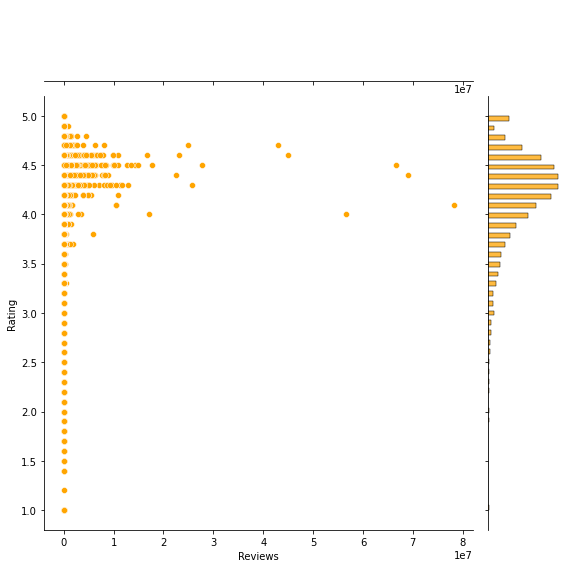

In [56]:
plt.figure(figsize = (20,10))
g = sns.jointplot(x="Reviews", y="Rating",color = 'orange', data=data,size = 8);

Text(0.5, 1.0, 'Rating VS Reveiws')

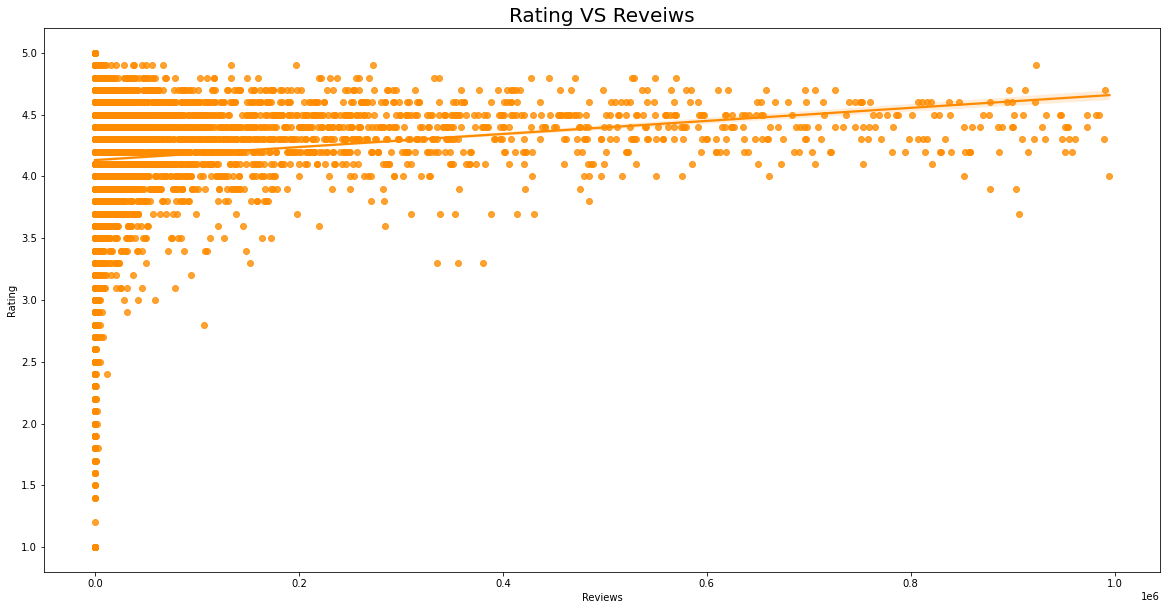

In [57]:
plt.figure(figsize = (20,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=data[data['Reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 20)

In [53]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').head(20)

,Genres,Rating
74,Parenting;Brain Games,3.800000
75,Parenting;Education,3.866667
43,Educational,3.871875
60,Health & Fitness;Action & Adventure,3.900000
11,Art & Design;Pretend Play,3.900000
46,Educational;Creativity,3.960000
35,Dating,3.970149
111,Video Players & Editors;Music & Video,4.000000
55,Entertainment;Pretend Play,4.000000
66,Lifestyle;Pretend Play,4.000000
